#  Viewer Segmentation & Quality Analysis
This notebook analyzes viewer behavior on STC TV by segmenting users by program class and visualizing quality preferences (SD vs HD).

In [4]:
pip install pyxlsb 

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("stc TV Data Set_T1.xlsb", sheet_name="Final_Dataset", engine="pyxlsb")

# Preview data
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


/var/folders/89/xx18lkhn1rsd6p_xh6jkk1vc0000gn/T/ipykernel_50798/637791393.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=program_counts.index, y=program_counts.values, palette="viridis")


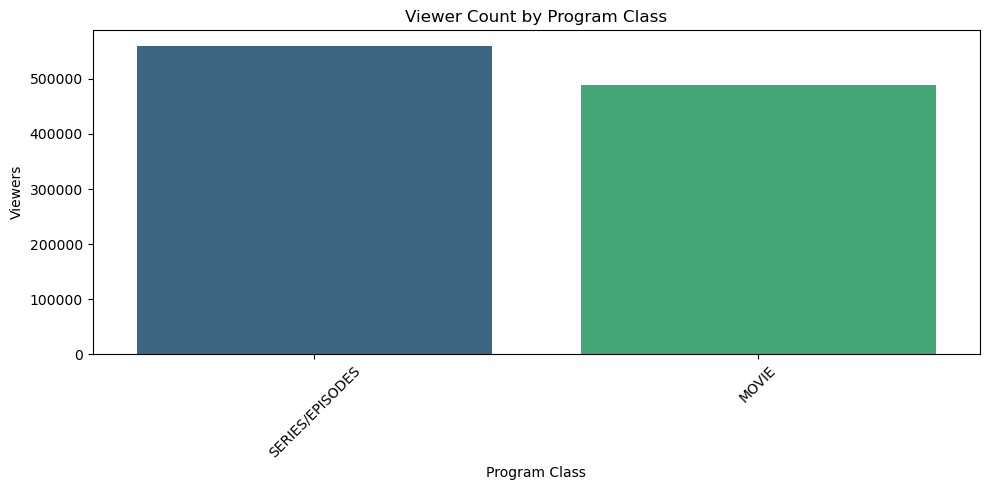

In [16]:
# Drop rows with missing program_class or hd (quality column)
df_clean = df.dropna(subset=['program_class', 'hd'])

# Count of viewers by program class
program_counts = df_clean['program_class'].value_counts()

# Plot: Viewer count by program class
plt.figure(figsize=(10, 5))
sns.barplot(x=program_counts.index, y=program_counts.values, palette="viridis")
plt.title("Viewer Count by Program Class")
plt.savefig("Viewer Count by Program Class.png", dpi=300, bbox_inches='tight')
plt.xlabel("Program Class")
plt.ylabel("Viewers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

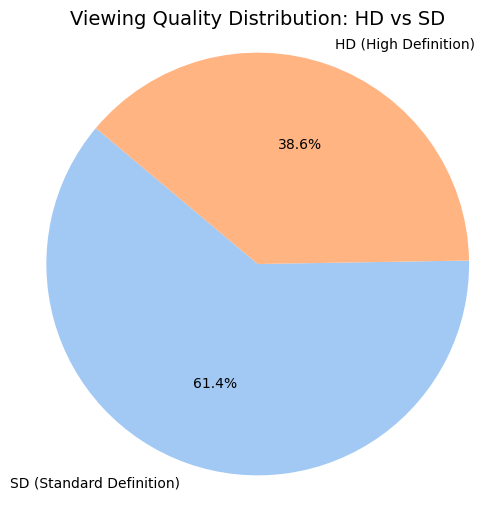

In [14]:
# Quality distribution (SD vs HD)
quality_counts = df_clean['hd'].value_counts()
labels = ['HD (High Definition)' if val == 1 else 'SD (Standard Definition)' for val in quality_counts.index]

# Pie chart with descriptive labels
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Viewing Quality Distribution: HD vs SD", fontsize=14)
plt.savefig("viewing_quality_pie.png", dpi=300, bbox_inches='tight')
plt.axis('equal')
plt.show();